# Comparing a Model Harmonic Oscillator to Analytical Solution using the Verlet Algorithm

## Model System
Hooke's law: $ F = -kx = ma $

Kinetic Energy: $ T(v) = \frac{mv^{2}}{2} $

Potential Energy: $ V(x) = \frac{kx^{2}}{2} $

Total Energy: $ E = T + V $ & $ \frac{dE}{dt} = 0 $

Solve for **x** and **v** by going through time steps **dt**

Assume $ x(0) $ is max displacement $ \implies v(0) = 0 \implies T(0) = 0 \implies E = V(0) = \frac{kx^{2}}{2} $

### Using Verlet Algorithm:

$ x(t + dt) = 2x(t) - x(t - dt) + \frac{F(t)}{m}dt^{2} = 2x(t) - x(t - dt) - \frac{kx(t)}{m}dt^{2} = x(t)\cdot\left[2 - \frac{k}{m}dt^{2}\right] - x(t - dt) $

$ v(t + dt) = \frac{x(t + dt) - x(t - dt)}{2dt} $

### Using Velocity Verlet Algorithm:

$ x(t + dt) = x(t) + v(t)dt + \frac{F(t)}{2m}dt^{2} $

$ v(t + dt) = v(t) + \frac{f(t + dt) + f(t)}{2m}dt = v(t) + \frac{f(t + dt)}{2m}dt + \frac{f(t)}{2m}dt = v(t + \frac{1}{2}dt) + \frac{f(t + dt)}{2m}dt $

where $ v(t + \frac{1}{2}dt) = v(t) + \frac{f(t)}{2m}dt $

### Energies:

$ T(t + dt) = \frac{m}{2} \cdot v(t + dt)^{2} $

$ V(t + dt) = \frac{k}{2} \cdot x(t + dt)^{2} $

## Analytical Solution

Hooke's law: $ F = -kx = ma = m\frac{d^{2}x}{dt^{2}} $

Position: $ x(t) = x(0) \cdot cos\left(\sqrt{\frac{k}{m}}t\right) $

Velocity: $ v(t) = \frac{d}{dt}\left[x(0) \cdot cos\left(\sqrt{\frac{k}{m}}t\right)\right] = -x(0)\sqrt{\frac{k}{m}} \cdot sin\left(\sqrt{\frac{k}{m}}t\right)$

Kinetic Energy: $ T(t) = \frac{m}{2} \cdot \left[-x(0)\sqrt{\frac{k}{m}} \cdot sin\left(\sqrt{\frac{k}{m}}t\right)\right]^{2} = x(0)^{2}\frac{k}{2} \cdot sin^{2}\left(\sqrt{\frac{k}{m}}t\right)$

Potential Energy: $ V(t) = \frac{k}{2} \cdot \left[x(0) \cdot cos\left(\sqrt{\frac{k}{m}}t\right)\right]^{2} = x(0)^{2}\frac{k}{2} \cdot cos^{2}\left(\sqrt{\frac{k}{m}}t\right) $

## Initialization

Imports:

In [80]:
%matplotlib inline
#%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import pint
import matplotlib.pyplot as plt
import numpy as np

Standard Units:

In [81]:
ureg = pint.UnitRegistry()
ureg.setup_matplotlib()
meter = ureg.meter
second = ureg.second
kilo = ureg.kilogram

Global Constants:

In [82]:
#system constants
k = 1 * kilo/second**2
m = 1 * kilo

#intial conditions
x0 = 1 * meter
v0 = 0 * meter/second
t0 = 0 * second

#simulation conditions
dt = 0.3 * second
cycles = 1000

## Definitions

In [83]:
#returns position after time delt using the verlet method
def verletPos(currPos,prevPos,delt):
    newPos = currPos * (2 - delt ** 2 * k / m) - prevPos
    return newPos

#returns velocity after time delt using the verlet method
def verletVel(newPos,prevPos,delt):
    vel = (newPos - prevPos) / (2 * delt)
    return vel

#returns position after time delt using the velocity verlet method
def velVerPos(currPos,vel,force,delt):
    newPos = currPos + (vel * delt) + (force * delt**2 / 2 / m)
    return newPos

#returns velocity after time delt using the velocity verlet method with half timestep
def velVerVel(currVel,force, delt):
    newVel = currVel + (delt * force / 2 / m)
    return newVel

#returns force from position
def force(pos):
    f = -1 * k * pos
    return f

#returns kinetic energy from velocity
def kineticE(vel):
    KE = m / 2 * vel**2
    return KE

#returns potential energy from position
def potentialE(pos):
    PE = k / 2 * pos**2
    return PE

#adds descriptive elements to pyplot plots
def plotDesc(xAxis,yAxis,title,legend):
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.title(title)
    if legend:
        plt.legend()


## Simulations

Analytical Solutions:

In [84]:
t = np.linspace(t0, cycles * dt, cycles + 1)
aPos = np.cos(t * np.sqrt(k/m)) * x0
aVel = np.sin(t * np.sqrt(k/m)) * x0 * np.sqrt(k/m) * -1
aKEs = np.sin(t * np.sqrt(k/m))**2 * x0**2 * k/2
aVEs = np.cos(t * np.sqrt(k/m))**2 * x0**2 * k/2

Verlet Algorithm Simulation:

In [85]:
#Initialize the arrays that will store the data
mPos = np.zeros(1) * meter
mVel = np.zeros(1) * meter/second
mKEs = np.zeros(1) * kilo*meter**2/second**2
mVEs = np.zeros(1) * kilo*meter**2/second**2

#Set initial values for the arrays and local variables
mPos[0] = x0
mVel[0] = v0
mKEs[0] = kineticE(v0)
mVEs[0] = potentialE(x0)
currPos = mPos[0]
prevPos = mPos[0]
newPos = mPos[0]
vel = mVel[0]

#MD loop
for i in range(cycles):
    #update position
    newPos = verletPos(currPos,prevPos,dt)
    mPos = np.append(mPos, newPos)
    #update velocity
    vel = verletVel(newPos,prevPos,dt)
    mVel = np.append(mVel, vel)
    #update energies
    mKEs = np.append(mKEs, kineticE(vel))
    mVEs = np.append(mVEs, potentialE(newPos))
    #update local variables for next loop
    prevPos = currPos
    currPos = newPos

Velocity Verlet Algorithm Simulation:

In [86]:
#Initialize the arrays that will store the data
vPos = np.zeros(1) * meter
vVel = np.zeros(1) * meter/second
vKEs = np.zeros(1) * kilo*meter**2/second**2
vVEs = np.zeros(1) * kilo*meter**2/second**2

#Set initial values for the arrays and local variables
vPos[0] = x0
vVel[0] = v0
vKEs[0] = kineticE(v0)
vVEs[0] = potentialE(x0)
pos = vPos[0]
vel = vVel[0]
frc = force(pos)

#MD loop
for i in range(cycles):
    #update position
    pos = velVerPos(pos,vel,frc,dt)
    #update velocity
    vel = velVerVel(vel,frc,dt)
    #update force
    frc = force(pos)
    #update velocity
    vel = velVerVel(vel,frc,dt)
    #store variables
    vPos = np.append(vPos, pos)
    vVel = np.append(vVel, vel)
    vKEs = np.append(vKEs, kineticE(vel))
    vVEs = np.append(vVEs, potentialE(pos))

Displacement Plots:

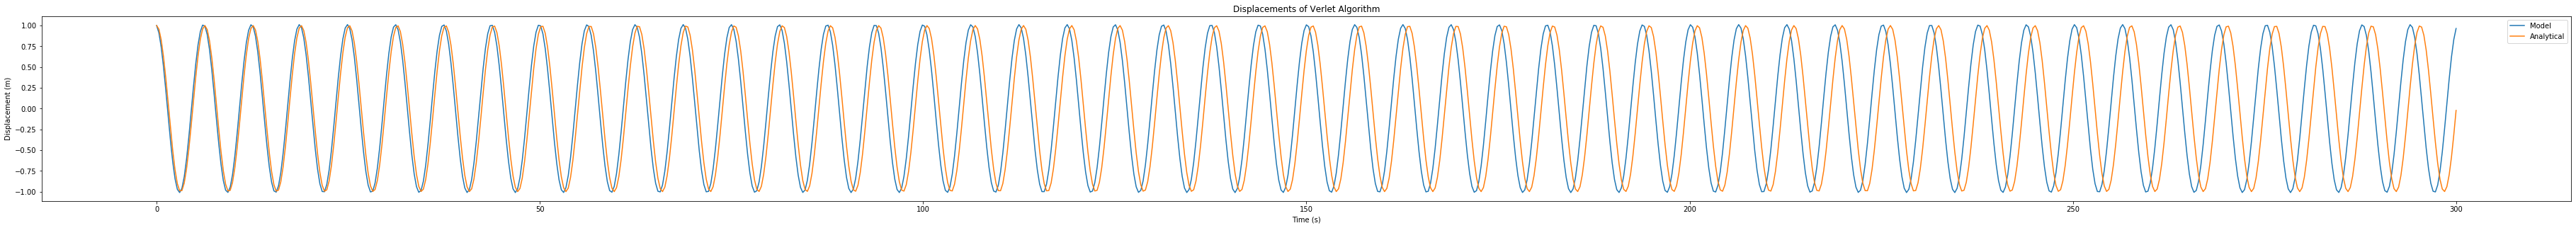

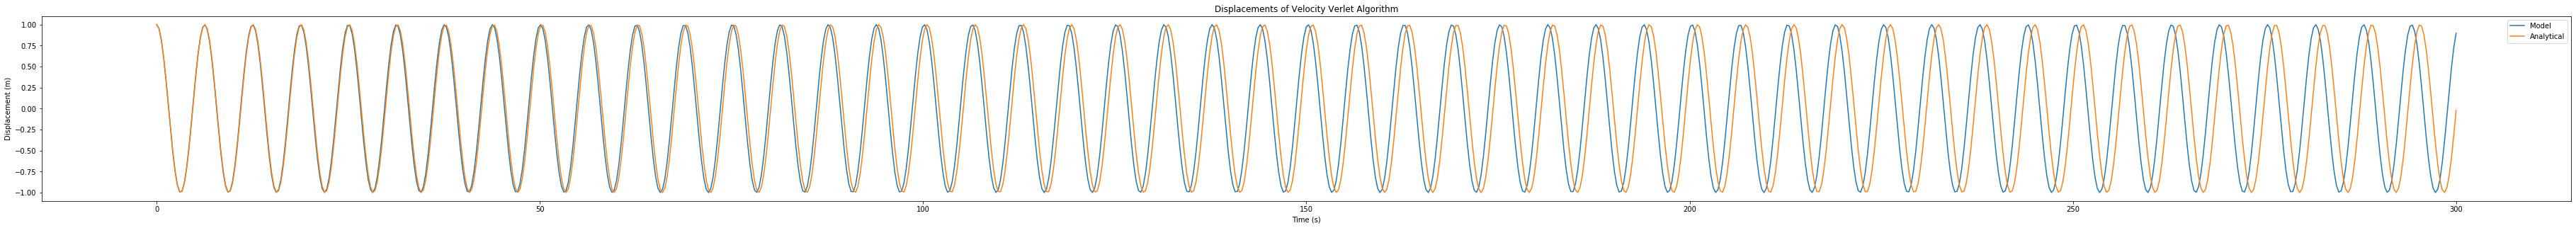

In [87]:
#verlet algortihm
fig, aa = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
aa.plot(t, mPos, label='Model')
aa.plot(t, aPos, label='Analytical')
plotDesc('Time (s)','Displacement (m)', 'Displacements of Verlet Algorithm', True)
#velocity verlet algoritm
fig, ab = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
ab.plot(t, vPos, label='Model')
ab.plot(t, aPos, label='Analytical')
plotDesc('Time (s)','Displacement (m)', 'Displacements of Velocity Verlet Algorithm', True)

Velocity Plots:

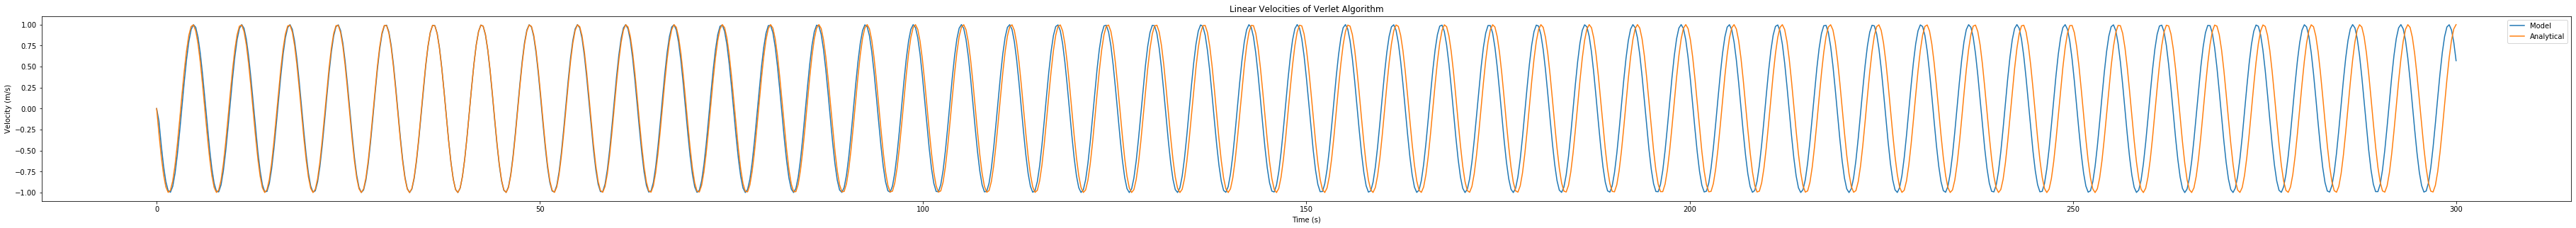

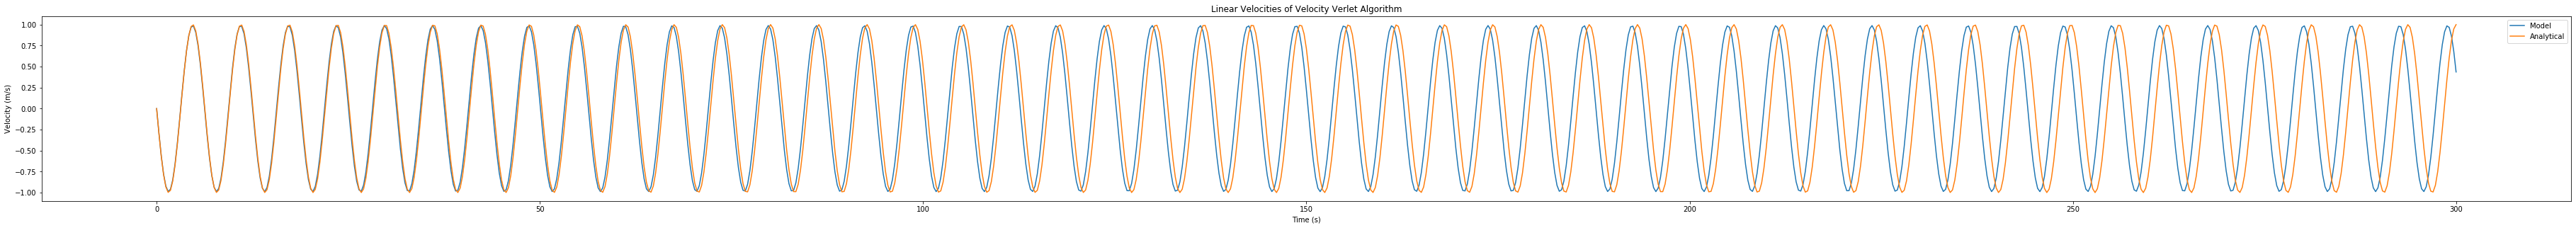

In [88]:
#verlet algorithm
fig, aa = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
aa.plot(t, mVel, label='Model')
aa.plot(t, aVel, label='Analytical')
plotDesc('Time (s)','Velocity (m/s)', 'Linear Velocities of Verlet Algorithm', True)
#velocity verlet algorithm
fig, ab = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
ab.plot(t, vVel, label='Model')
ab.plot(t, aVel, label='Analytical')
plotDesc('Time (s)','Velocity (m/s)', 'Linear Velocities of Velocity Verlet Algorithm', True)

Kinetic Energy Plot:

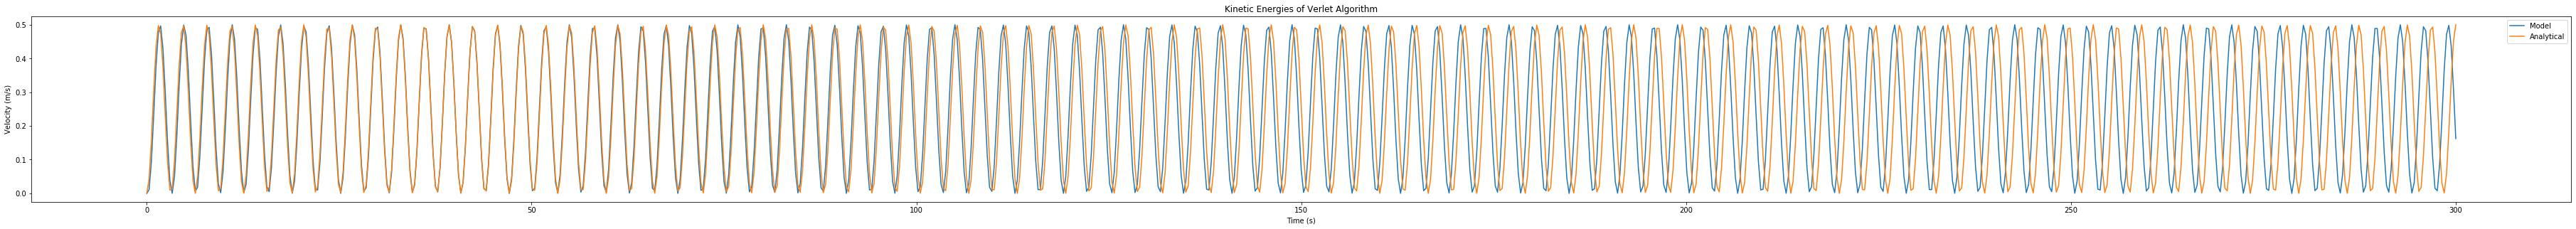

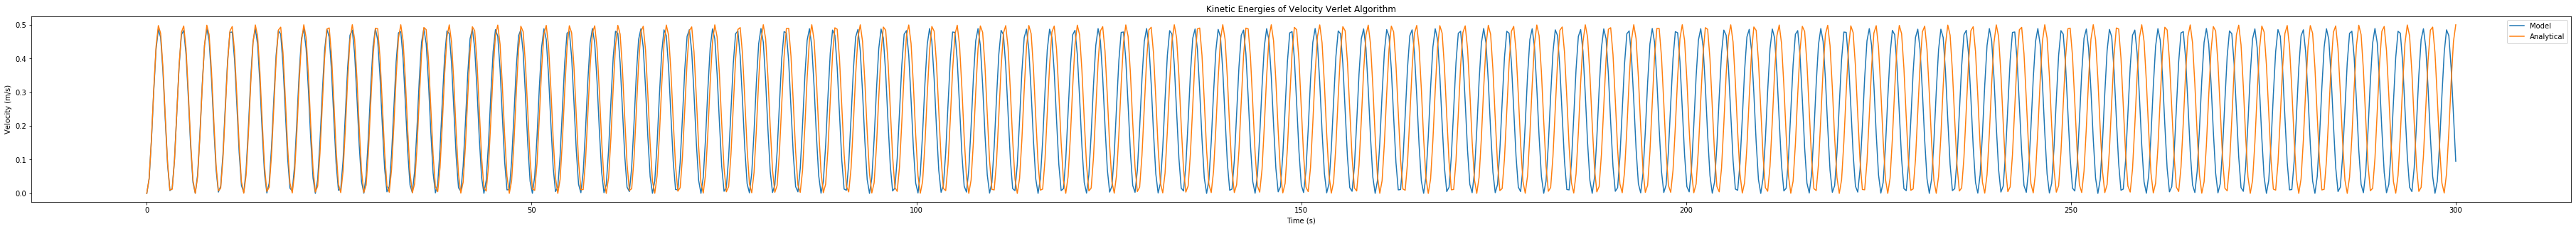

In [89]:
#verlet algorithm
fig, aa = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
aa.plot(t, mKEs, label='Model')
aa.plot(t, aKEs, label='Analytical')
plotDesc('Time (s)','Velocity (m/s)', 'Kinetic Energies of Verlet Algorithm', True)
#velocity verlet algorithm
fig, ab = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
ab.plot(t, vKEs, label='Model')
ab.plot(t, aKEs, label='Analytical')
plotDesc('Time (s)','Velocity (m/s)', 'Kinetic Energies of Velocity Verlet Algorithm', True)

Potential Energy Plot:

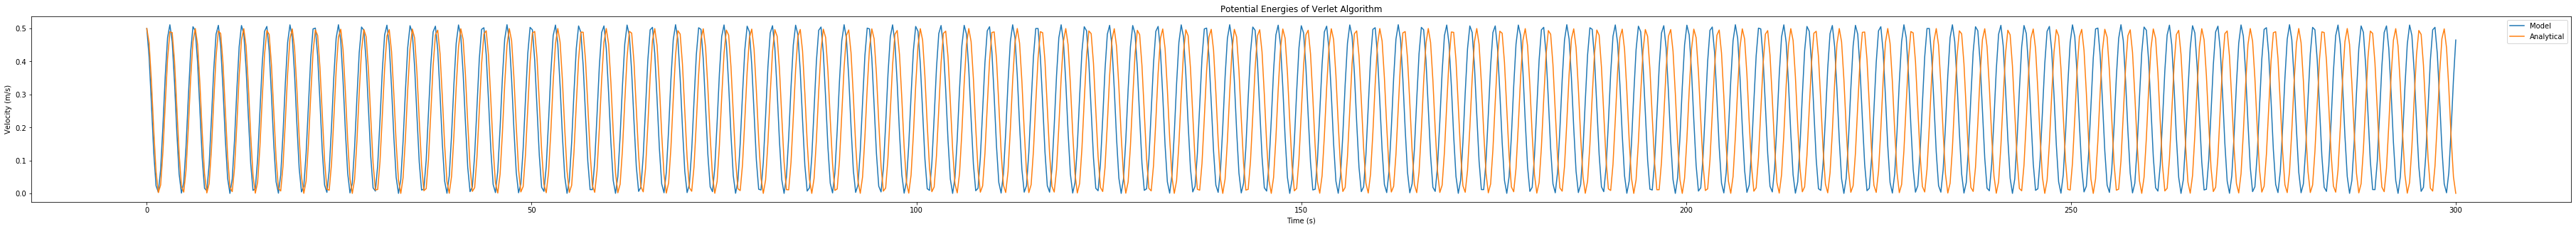

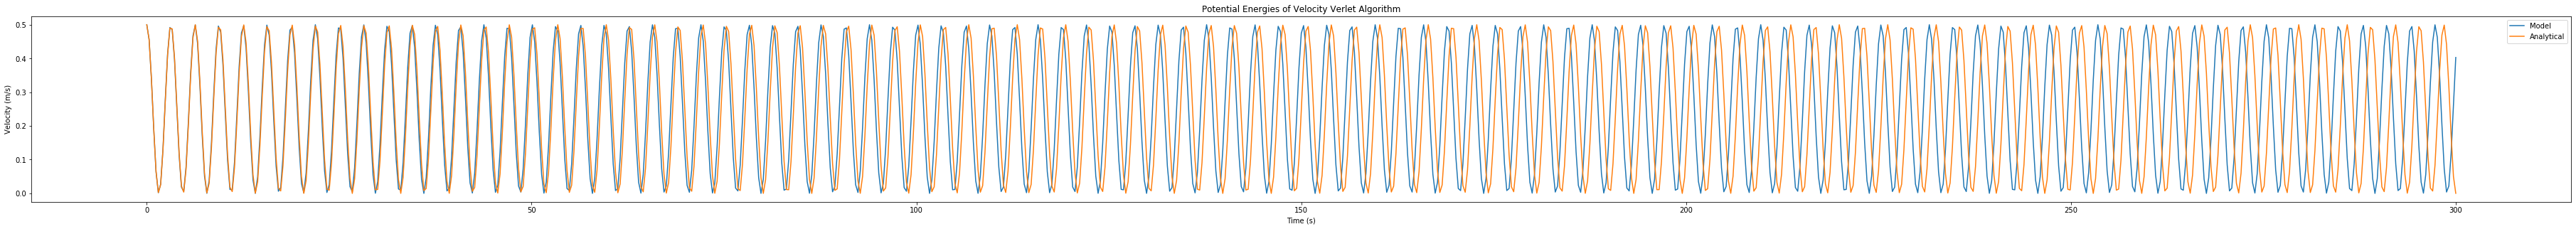

In [90]:
#verlet algorithm
fig, aa = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
aa.plot(t, mVEs, label='Model')
aa.plot(t, aVEs, label='Analytical')
plotDesc('Time (s)','Velocity (m/s)', 'Potential Energies of Verlet Algorithm', True)
#velocity verlet algorithm
fig, ab = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
ab.plot(t, vVEs, label='Model')
ab.plot(t, aVEs, label='Analytical')
plotDesc('Time (s)','Velocity (m/s)', 'Potential Energies of Velocity Verlet Algorithm', True)

Energy Plots:

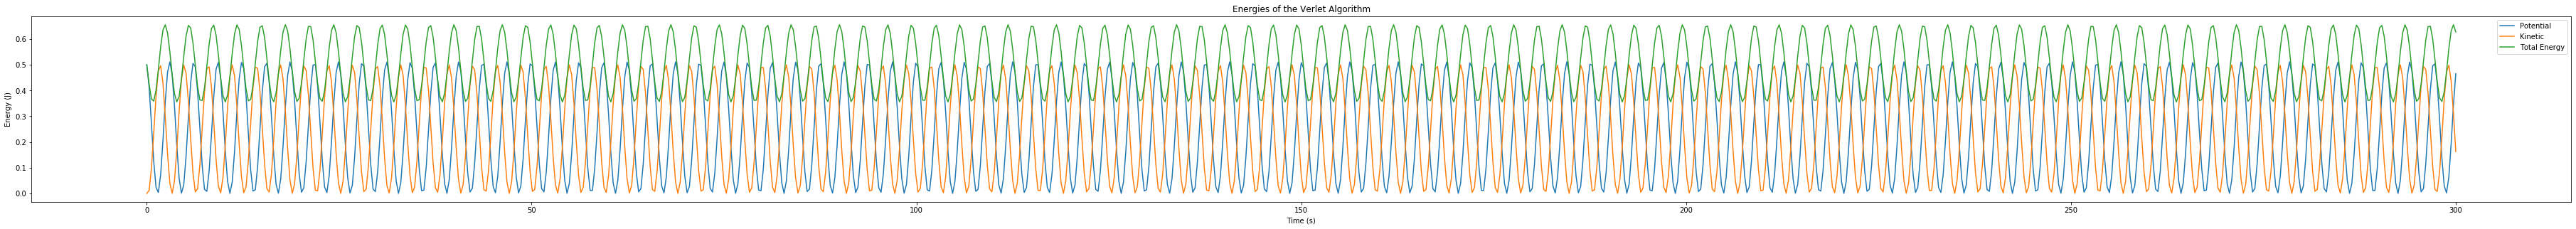

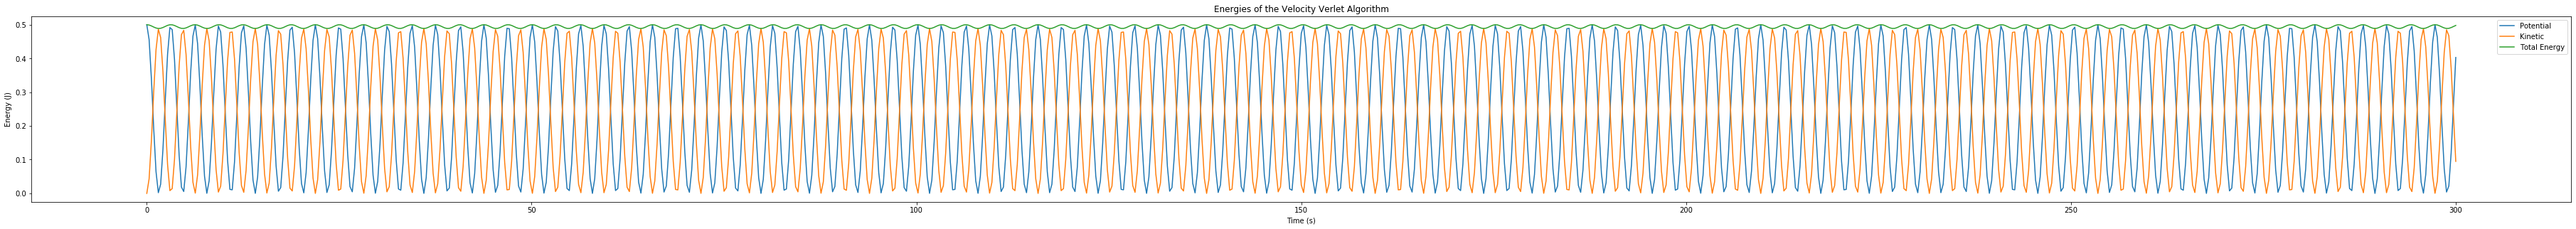

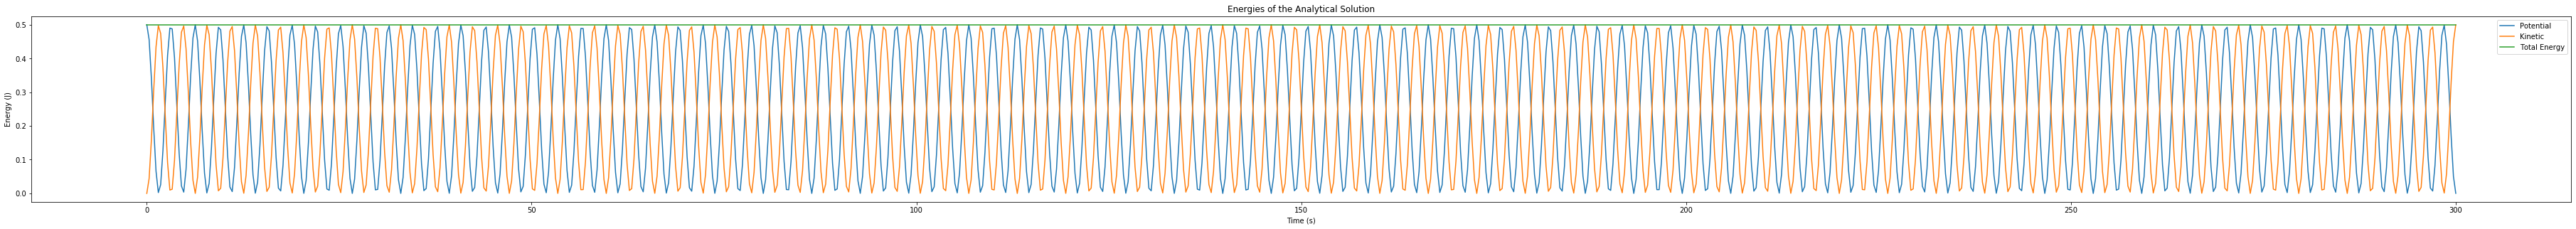

In [91]:
#Verlet Algorithm
fig, aa = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
aa.plot(t, mVEs, label='Potential')
aa.plot(t, mKEs, label='Kinetic')
aa.plot(t, mVEs + mKEs, label='Total Energy')
plotDesc('Time (s)', 'Energy (J)', 'Energies of the Verlet Algorithm', True)
#Velocity Verlet Algorithm
fig, ab = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
ab.plot(t, vVEs, label='Potential')
ab.plot(t, vKEs, label='Kinetic')
ab.plot(t, vVEs + vKEs, label='Total Energy')
plotDesc('Time (s)', 'Energy (J)', 'Energies of the Velocity Verlet Algorithm', True)
#Analytical
fig, ac = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
ac.plot(t, aVEs, label='Potential')
ac.plot(t, aKEs, label='Kinetic')
ac.plot(t, aVEs + aKEs, label='Total Energy')
plotDesc('Time (s)', 'Energy (J)', 'Energies of the Analytical Solution', True)

Error in Energy:

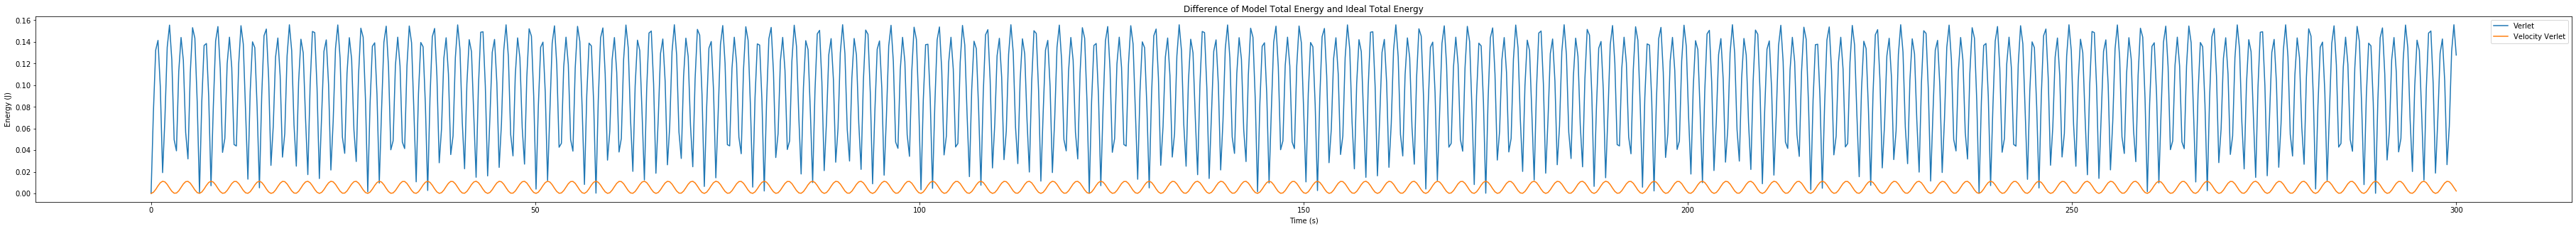

In [92]:
fig, aa = plt.subplots(figsize=(6.4 * cycles / 100,4.8))
aa.plot(t, np.absolute(mKEs + mVEs - aKEs - aVEs), label='Verlet')
aa.plot(t, np.absolute(vKEs + vVEs - aKEs - aVEs), label='Velocity Verlet')
plotDesc('Time (s)', 'Energy (J)', 'Difference of Model Total Energy and Ideal Total Energy', True)